# Práctica 4: Distribuciones de Zipf everywhere

**Fecha de entrega: Domingo 01 de Octubre 2023 - 11:59pm**

- Obtener las frecuencias a otros niveles de las lenguas (español, nahúatl y otomí) y comprobar si se cumple zipf
    - Etiquetas POS (obtenerlas de algun corpus disponible en `nltk`)
        - Español
        - Inglés
    - Caractéres
        - Nahúatl
        - Otomí
        - Español
    - [n-gramas](https://www.ecured.cu/N-grama) de caractéres (`n=2`)
        - Nahúatl
        - Otomí
        - Español
        - Ejemplo: "Mi querida" - `["mi", "qu", "ue", "er", "ri", "id", "da"]`
- Comprobar si las *stopwords* que encontramos en paqueterias de *NLP* coinciden con las palabras más comúnes obtenidas en Zipf
    - Realizar una nube de palabras filtrando las stopwords de paqueteria y las obtenidas através de Zipf
    - ¿Obtenemos el mismo resultado? Si o no y ¿Porqué?
    
#### EXTRA: Zipf para lenguajes artificiales aleatorios

- Encontrar la forma de generar un lenguaje artificial aleatorio y comprobar si cumple Zipf   


In [1]:
# Bibliotecas
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]
from re import sub

In [2]:
def get_frequencies(vocabulary: Counter, n: int) -> list:
    return [_[1] for _ in vocabulary.most_common(n)]

def plot_frequencies(frequencies: list, title="Freq of words"):
    x = list(range(1, len(frequencies)+1))
    plt.plot(x, frequencies, "-v")
    plt.xlabel("Freq rank (r)")
    plt.ylabel("Freq (f)")
    plt.title(title)

## 1. Obtener las frecuencias a otros niveles de las lenguas (español, nahúatl y otomí) y comprobar si se cumple zipf

In [3]:
import pandas as pd
from tabulate import tabulate

def print_frequencies(list, plot_title):
    """
    Imprime los 10 valores más frecuentes, y una gráfica de las frecuencias.
    """
    vocabulary = Counter(list)
    most_common = vocabulary.most_common(10)
    most_common = [ {'value':pair[0], 'frequency':pair[1]} for pair in most_common ]
    print("10 más comunes:")
    print(tabulate(pd.DataFrame(most_common), headers='keys', tablefmt='psql', showindex=False))
    frequencies = get_frequencies(vocabulary, 100)
    plot_frequencies(frequencies, title=plot_title)

### 1.1 Etiquetas POS 
(Obtenerlas de algún corpus disponible en `nltk`)

    - Español
    - Inglés

In [4]:
import nltk
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

#### 1.1.1 Español

In [5]:
# Descargando el corpus cess_esp: https://www.nltk.org/book/ch02.html#tab-corpora
nltk.download('cess_esp')

[nltk_data] Downloading package cess_esp to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


True

In [6]:
from nltk.corpus import cess_esp
# Cargando oraciones
corpus_esp = cess_esp.tagged_words()
print("# of words:", len(corpus_esp)) 
corpus_esp[:10]

# of words: 192686


[('El', 'da0ms0'),
 ('grupo', 'ncms000'),
 ('estatal', 'aq0cs0'),
 ('Electricité_de_France', 'np00000'),
 ('-Fpa-', 'Fpa'),
 ('EDF', 'np00000'),
 ('-Fpt-', 'Fpt'),
 ('anunció', 'vmis3s0'),
 ('hoy', 'rg'),
 (',', 'Fc')]

In [7]:
# Parseamos las etiquetas a algo legible
import requests

def get_tags_map():
    tags_raw = requests.get("https://gist.githubusercontent.com/vitojph/39c52c709a9aff2d1d24588aba7f8155/raw/af2d83bc4c2a7e2e6dbb01bd0a10a23a3a21a551/universal_tagset-ES.map").text.split("\n")
    tags_map = {line.split("\t")[0].lower(): line.split("\t")[1] for line in tags_raw}
    return tags_map

def map_tag(tag: str, tags_map=get_tags_map()) -> str:
    return tags_map.get(tag.lower(), "N/F")

def parse_tags(corpora: list[tuple]) -> list[tuple]:
    return [(word, map_tag(tag)) for word, tag in corpora]

In [8]:
corpus_esp = parse_tags(corpus_esp)

In [9]:
print("Corpus length:", len(corpus_esp))
corpus_esp[:10]

Corpus length: 192686


[('El', 'DET'),
 ('grupo', 'NOUN'),
 ('estatal', 'ADJ'),
 ('Electricité_de_France', 'NOUN'),
 ('-Fpa-', '.'),
 ('EDF', 'NOUN'),
 ('-Fpt-', '.'),
 ('anunció', 'VERB'),
 ('hoy', 'ADV'),
 (',', '.')]

In [10]:
# Ahora convertimos la lista en una lista de POS tags
pos_esp = [ tag for w, tag in corpus_esp ]
print(pos_esp[:30])

['DET', 'NOUN', 'ADJ', 'NOUN', '.', 'NOUN', '.', 'VERB', 'ADV', '.', 'NOUN', '.', 'DET', 'NOUN', 'ADP', 'NUM', 'ADP', 'DET', 'NOUN', 'ADJ', 'NOUN', '.', 'NOUN', '.', '.', 'ADJ', 'ADP', 'DET', 'ADJ', 'NOUN']


10 más comunes:
+---------+-------------+
| value   |   frequency |
|---------+-------------|
| NOUN    |       44646 |
| ADP     |       32578 |
| DET     |       27425 |
| .       |       24174 |
| VERB    |       22149 |
| ADJ     |       13703 |
| CONJ    |       10381 |
| PRON    |        8511 |
| ADV     |        7270 |
| NUM     |        1805 |
+---------+-------------+


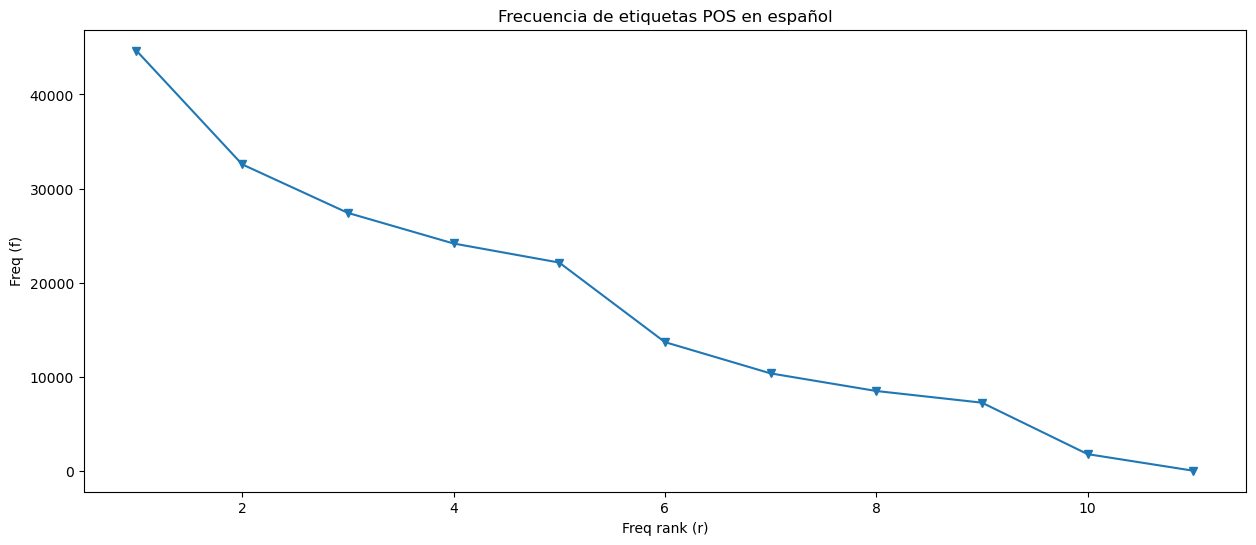

In [11]:
print_frequencies(pos_esp, plot_title="Frecuencia de etiquetas POS en español")

#### 1.1.2 Inglés

In [12]:
# Descargando el corpus brown
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [13]:
from nltk.corpus import brown
# Cargando oraciones
corpus_eng = brown.tagged_words(tagset='universal')
print("# of words:", len(corpus_eng))
corpus_eng[:10]

# of words: 1161192


[('The', 'DET'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'ADJ'),
 ('Jury', 'NOUN'),
 ('said', 'VERB'),
 ('Friday', 'NOUN'),
 ('an', 'DET'),
 ('investigation', 'NOUN'),
 ('of', 'ADP')]

In [14]:
# Ahora convertimos la lista en una lista de POS tags
pos_eng = [ tag for w, tag in corpus_eng ]
print(pos_eng[:10])
len(pos_eng)

['DET', 'NOUN', 'NOUN', 'ADJ', 'NOUN', 'VERB', 'NOUN', 'DET', 'NOUN', 'ADP']


1161192

10 más comunes:
+---------+-------------+
| value   |   frequency |
|---------+-------------|
| NOUN    |      275558 |
| VERB    |      182750 |
| .       |      147565 |
| ADP     |      144766 |
| DET     |      137019 |
| ADJ     |       83721 |
| ADV     |       56239 |
| PRON    |       49334 |
| CONJ    |       38151 |
| PRT     |       29829 |
+---------+-------------+


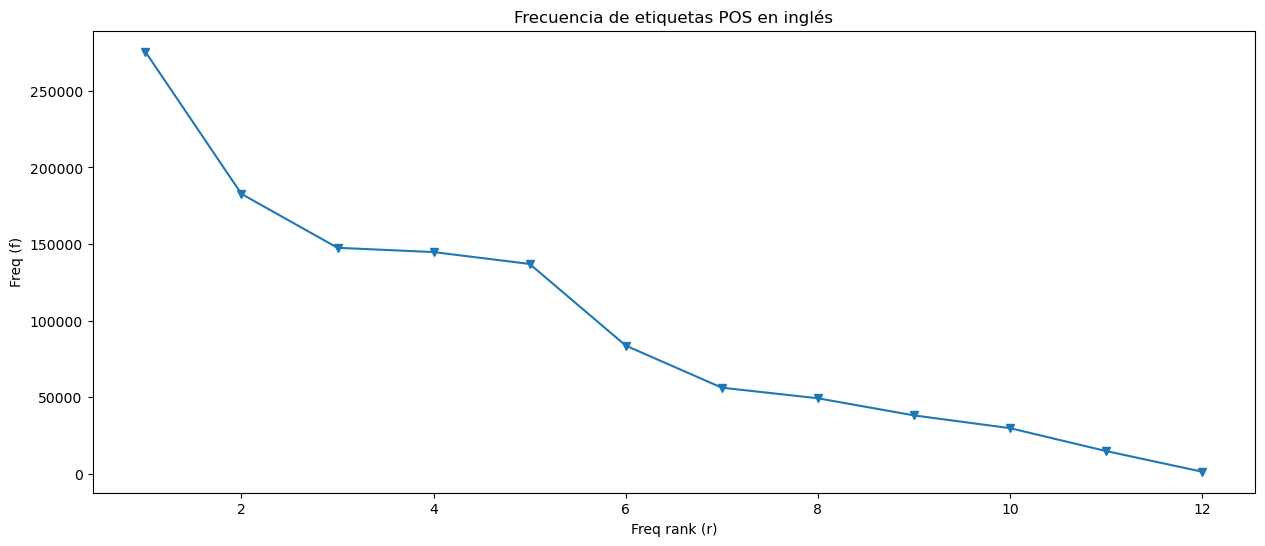

In [15]:
print_frequencies(pos_eng, plot_title="Frecuencia de etiquetas POS en inglés")

Tanto para el inglés como para el español había pocas etiquetas POS, así que el comportamiento de la gráfica no es tan similar al de Zipf, sin embargo la forma se parace un poco.

### 1.2 Caractéres

    - Nahúatl
    - Otomí
    - Español

In [16]:
# usaremos pyelotl
!pip install elotl

In [17]:
from elotl import corpus as elotl_corpus

print("Name\t\tDescription")
for row in elotl_corpus.list_of_corpus():
    print(row)

Name		Description
['axolotl', 'Is a nahuatl corpus']
['tsunkua', 'Is an otomí corpus']


In [18]:
# Algunas funciones útiles:

def extract_words_from_sentence(sentence: str) -> list:
    return sub(r'[^\w\s\']', ' ', sentence).lower().split()

def preprocess_corpus(corpus):
    # Obtener la oración de L1,
    # quitar signos de puntuación y
    # obtiene la lista de palabras
    word_list_l1 = []
    word_list_l2 = []
    for row in corpus:
        word_list_l1.extend(extract_words_from_sentence(row[0]))
    # Obtener la oración de L1,
    # quitar signos de puntuación y
    # obtiene la lista de palabras
        word_list_l2.extend(extract_words_from_sentence(row[1]))
    return word_list_l1, word_list_l2

#### 1.2.1 Nahúatl

In [19]:
# Axolotl es un corpus paralelo Nahúatl - Español
axolotl = elotl_corpus.load("axolotl")

print("# oraciones paralelas en Axolotl:", len(axolotl))

print("\nEjemplo:\n", axolotl[0], '\n')
for row in axolotl:
    print("Oración esp:  ", row[0])
    print("Oración nah:  ", row[1])
    print("Variante:     ", row[2])
    print("Source:       ", row[3])
    break

# oraciones paralelas en Axolotl: 16117

Ejemplo:
 ['Vino a iluminar el sol y allí fue a ver a su', 'tlaminako tonati uan noponi kiitato', '', 'Lo que relatan de antes (cuentos tének y nahuas de la huasteca)'] 

Oración esp:   Vino a iluminar el sol y allí fue a ver a su
Oración nah:   tlaminako tonati uan noponi kiitato
Variante:      
Source:        Lo que relatan de antes (cuentos tének y nahuas de la huasteca)


In [20]:
# Obtenemos la lista de todas las palabras (tokens) en nahuatl del corpus
_, nahuatl_words = preprocess_corpus(axolotl)
print("# de tokens:", len(nahuatl_words))
nahuatl_words[:10]

# de tokens: 286805


['tlaminako',
 'tonati',
 'uan',
 'noponi',
 'kiitato',
 'auh',
 'in',
 'ye',
 'yuhqui',
 'in']

In [21]:
# pasamos la lista de palabras a una lista de caracteres
def words2chars(words):
    return [char for w in words for char in w]

In [22]:
nahuatl_chars = words2chars(nahuatl_words)

print("# chars:", len(nahuatl_chars))
print(nahuatl_chars[:30])

# chars: 1823707
['t', 'l', 'a', 'm', 'i', 'n', 'a', 'k', 'o', 't', 'o', 'n', 'a', 't', 'i', 'u', 'a', 'n', 'n', 'o', 'p', 'o', 'n', 'i', 'k', 'i', 'i', 't', 'a', 't']


10 más comunes:
+---------+-------------+
| value   |   frequency |
|---------+-------------|
| a       |      240008 |
| i       |      218038 |
| n       |      162612 |
| t       |      149615 |
| o       |      127941 |
| c       |      125389 |
| l       |      122619 |
| u       |      120714 |
| e       |      105715 |
| h       |       94779 |
+---------+-------------+


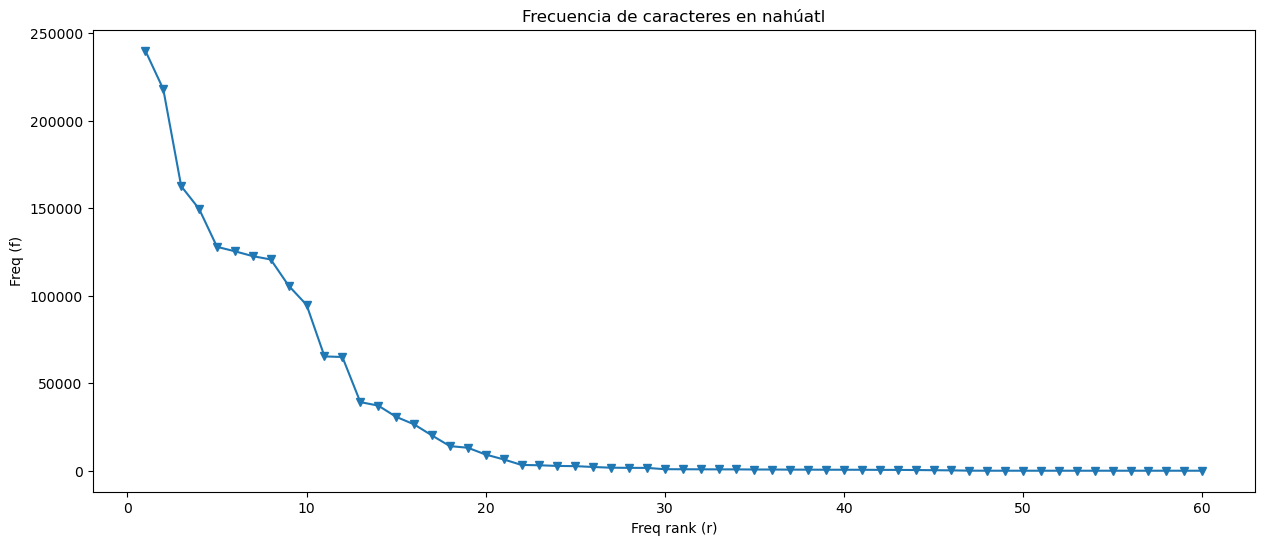

In [23]:
print_frequencies(nahuatl_chars, plot_title="Frecuencia de caracteres en nahúatl")

#### 1.2.2 Otomí

10 más comunes:
+---------+-------------+
| value   |   frequency |
|---------+-------------|
| a       |       34672 |
| i       |       23253 |
| n       |       19120 |
| t       |       14246 |
| u       |       13753 |
| e       |       13705 |
| '       |       13176 |
| h       |       13068 |
| o       |       11874 |
| m       |        9672 |
+---------+-------------+


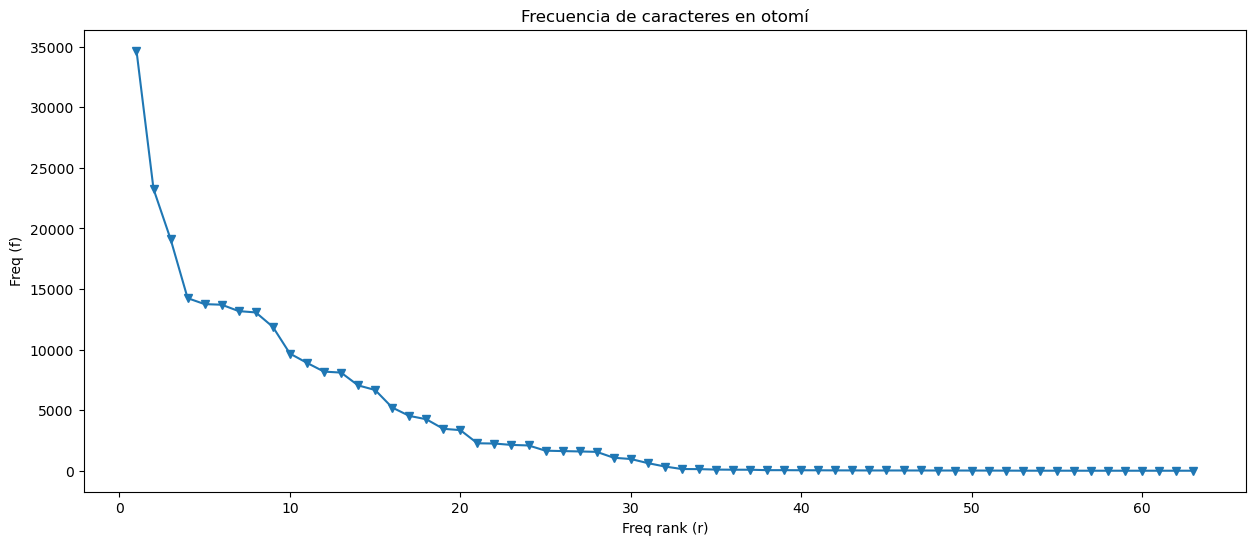

In [24]:
# Tsunkua es un corpus paralelo Otomí - Español
tsunkua = elotl_corpus.load("tsunkua")

# Obtenemos la lista de todas las palabras (tokens) en otomi del corpus
_, otomi_words = preprocess_corpus(tsunkua)

otomi_chars = words2chars(otomi_words)

print_frequencies(otomi_chars, plot_title="Frecuencia de caracteres en otomí")

#### 1.2.3 Español

In [25]:
esp_words = cess_esp.words()
print("# of words:", len(esp_words)) 
esp_words[:10]

# of words: 192686


['El',
 'grupo',
 'estatal',
 'Electricité_de_France',
 '-Fpa-',
 'EDF',
 '-Fpt-',
 'anunció',
 'hoy',
 ',']

10 más comunes:
+---------+-------------+
| value   |   frequency |
|---------+-------------|
| e       |      107336 |
| a       |       99691 |
| o       |       71002 |
| s       |       59962 |
| n       |       58840 |
| r       |       55694 |
| i       |       53313 |
| l       |       47821 |
| d       |       42892 |
| t       |       37305 |
+---------+-------------+


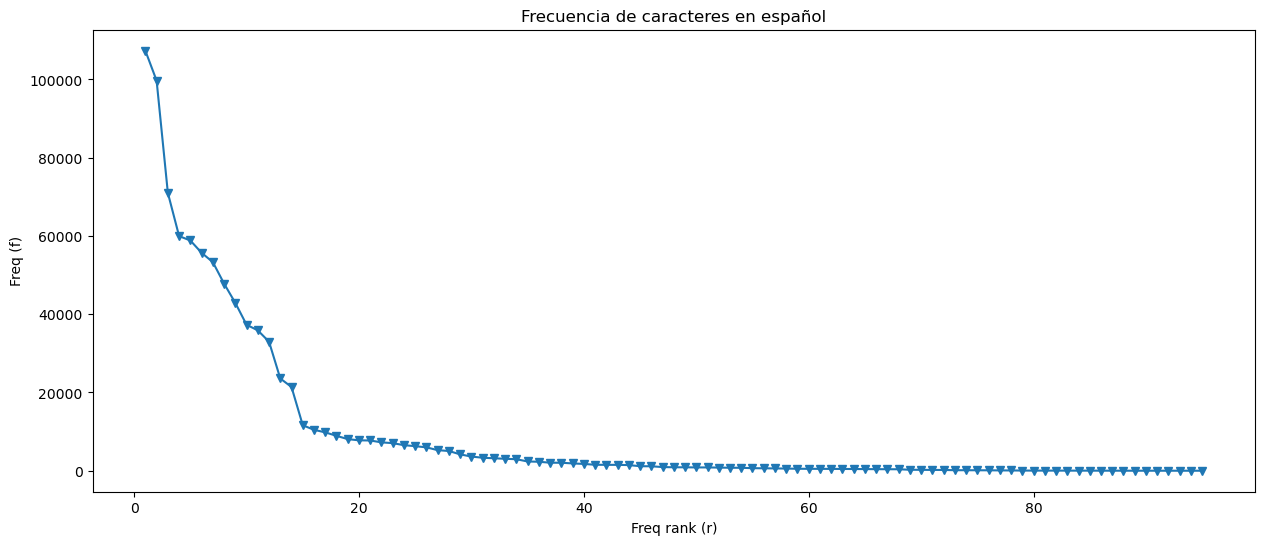

In [26]:
esp_chars = words2chars(esp_words)

print_frequencies(esp_chars, plot_title="Frecuencia de caracteres en español")

En los tres idiomas, la frecuencia de caracteres parece sí comportanrse parecido a Zipf.

### 1.3 n-gramas
n-gramas de caractéres (`n=2`)

    - Nahúatl
    - Otomí
    - Español

Ejemplo: "Mi querida" - `["mi", "qu", "ue", "er", "ri", "id", "da"]`

In [27]:
from nltk import ngrams
n = 2

#### 1.3.1 Nahúatl

In [28]:
ngrams_nahuatl = list(ngrams(nahuatl_chars, n))

10 más comunes:
+------------+-------------+
| value      |   frequency |
|------------+-------------|
| ('t', 'l') |       53821 |
| ('a', 'n') |       52408 |
| ('c', 'a') |       43135 |
| ('u', 'i') |       41842 |
| ('i', 'n') |       39770 |
| ('h', 'u') |       39530 |
| ('q', 'u') |       39149 |
| ('u', 'a') |       36632 |
| ('l', 'a') |       35438 |
| ('n', 'i') |       33281 |
+------------+-------------+


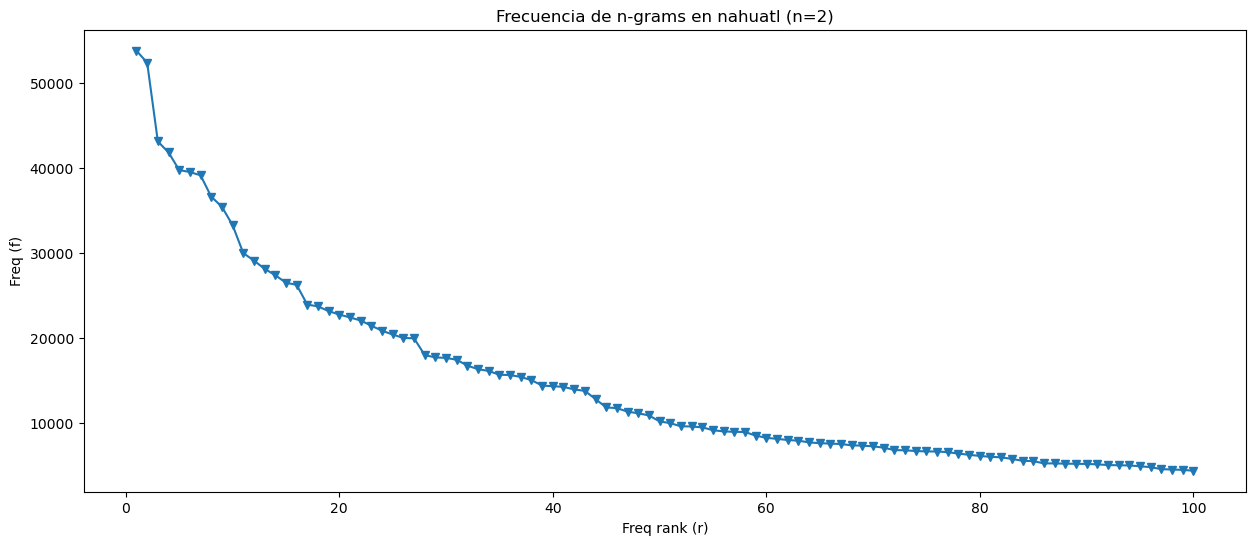

In [29]:
print_frequencies(ngrams_nahuatl, plot_title=f"Frecuencia de n-grams en nahuatl (n={n})")

#### 1.3.2 Otomí

In [30]:
ngrams_otomi = list(ngrams(otomi_chars, n))

10 más comunes:
+------------+-------------+
| value      |   frequency |
|------------+-------------|
| ('r', 'a') |        6611 |
| ('a', 'n') |        5526 |
| ('y', 'a') |        5220 |
| ('i', 'n') |        4370 |
| ("'", 'a') |        3902 |
| ('a', 't') |        3896 |
| ('b', 'i') |        3555 |
| ('t', 's') |        3493 |
| ('a', 'b') |        3163 |
| ('a', 'm') |        3014 |
+------------+-------------+


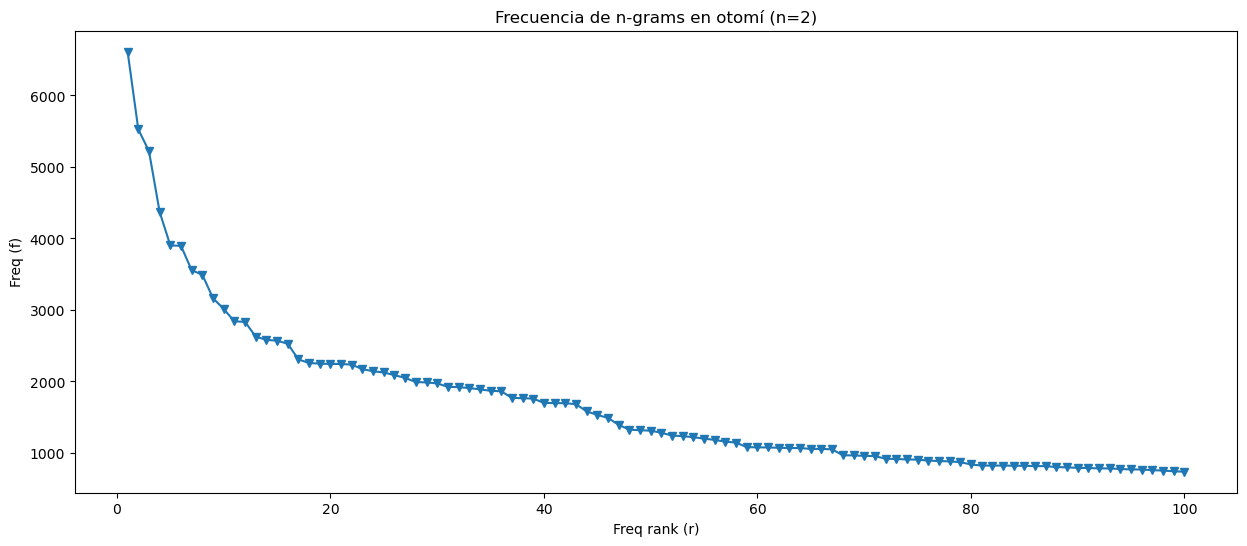

In [31]:
print_frequencies(ngrams_otomi, plot_title=f"Frecuencia de n-grams en otomí (n={n})")

#### 1.3.3 Español

In [32]:
ngrams_esp = list(ngrams(esp_chars, n))

10 más comunes:
+------------+-------------+
| value      |   frequency |
|------------+-------------|
| ('d', 'e') |       20914 |
| ('e', 'n') |       17583 |
| ('e', 's') |       17184 |
| ('e', 'l') |       15236 |
| ('o', 's') |       13929 |
| ('l', 'a') |       13293 |
| ('e', 'r') |       12354 |
| ('a', 'r') |       11573 |
| ('a', 's') |       11573 |
| ('r', 'a') |       11160 |
+------------+-------------+


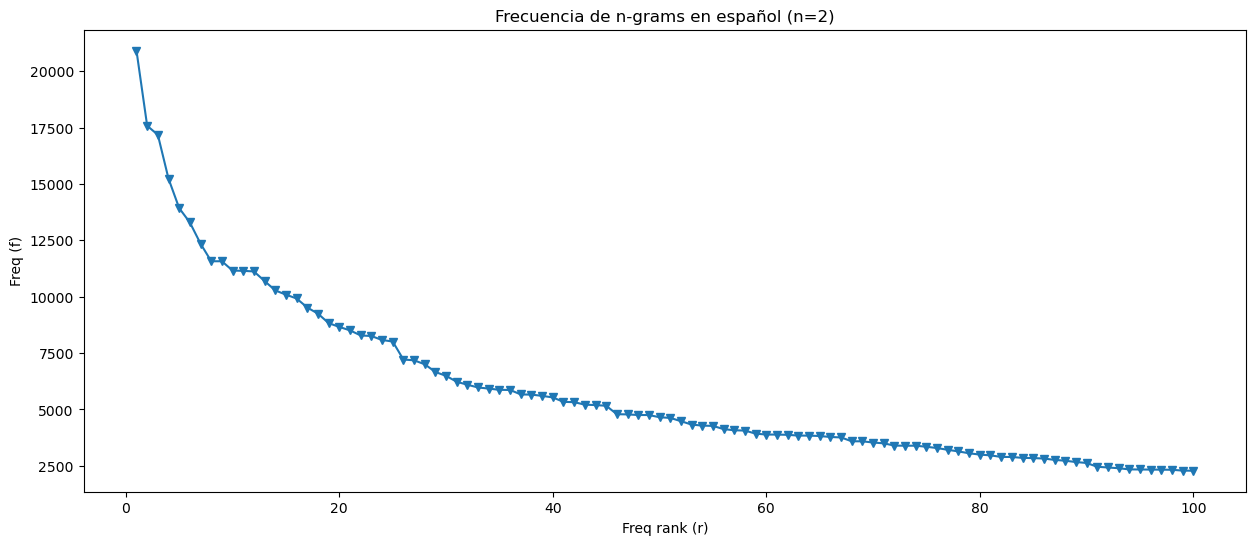

In [33]:
print_frequencies(ngrams_esp, plot_title=f"Frecuencia de n-grams en español (n={n})")

En los tres idiomas, la frecuencia de bigramas parece sí comportarse de acuerdo a la ley de Zipf.

## 2. Comprobar si las *stopwords* que encontramos en paqueterias de *NLP* coinciden con las palabras más comúnes obtenidas en Zipf
    - Realizar una nube de palabras filtrando las stopwords de paqueteria y las obtenidas através de Zipf
    - ¿Obtenemos el mismo resultado? Si o no y ¿Porqué?
    
Haremos esto para el corpus en inglés.

In [34]:
from wordcloud import WordCloud

def plot_word_cloud(word_list, max_words_in_plot):
    """
    Función para mostrar la nube de palabras dada una lista de palabras.
    """
    freqs = Counter(word_list)
    df = pd.DataFrame({ 'word': freqs.keys(), 'count': freqs.values() })
    data = dict( zip(df['word'].tolist(), df['count'].tolist()) )
    wc = WordCloud(width=800, height=400, max_words=max_words_in_plot).generate_from_frequencies(data)
    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [35]:
corpus_eng_words = brown.words()
corpus_eng_words = [w.lower() for w in corpus_eng_words]
print("# of words:", len(corpus_eng_words)) 
corpus_eng_words[:10]

# of words: 1161192


['the',
 'fulton',
 'county',
 'grand',
 'jury',
 'said',
 'friday',
 'an',
 'investigation',
 'of']

### Nube de palabras filtrando las stopwords de nltk

In [36]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
eng_stopwords = stopwords.words('english')

In [38]:
filtered_words_eng_stopwords = list(filter(lambda w: w.lower() not in eng_stopwords, corpus_eng_words))

Word cloud del corpus en inglés filtrado con las stopwords de nltk:


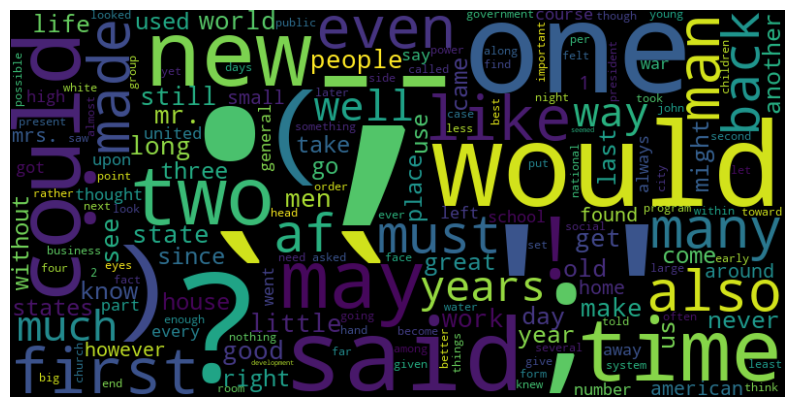

In [39]:
print("Word cloud del corpus en inglés filtrado con las stopwords de nltk:")
plot_word_cloud(filtered_words_eng_stopwords, len(eng_stopwords))

### Nube de palabras filtrando las stopwords obtenidas usando Zipf

Vamos a generar la misma cantidad de stopwords que las proporcionadas por nltk.

In [40]:
def get_zipf_stopwords(corpus_list, amount):
    vocabulary = Counter(corpus_list)
    most_common = vocabulary.most_common(amount)
    return [ w for w, freq in most_common ]

In [41]:
eng_stopwords_zipf = get_zipf_stopwords(corpus_eng_words, len(eng_stopwords))

In [42]:
filtered_words_eng_stopwords_zipf = list(filter(lambda w: w.lower() not in eng_stopwords_zipf, corpus_eng_words))

Word cloud del corpus en inglés filtrado con las stopwords encontradas por zipf:


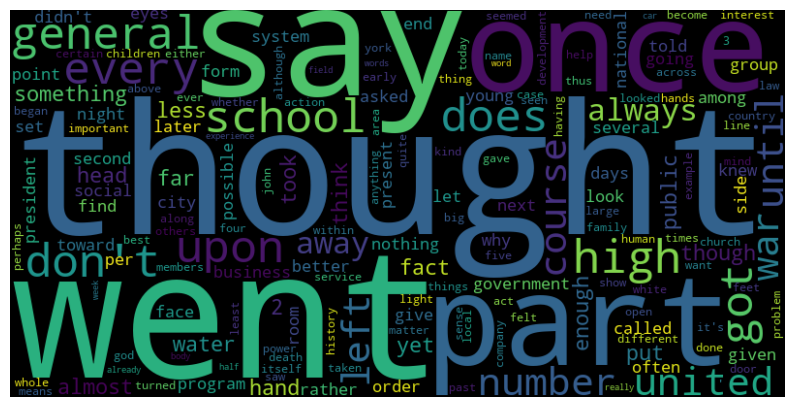

In [43]:
print("Word cloud del corpus en inglés filtrado con las stopwords encontradas por zipf:")
plot_word_cloud(filtered_words_eng_stopwords_zipf, len(eng_stopwords_zipf))

No obtenemos el mismo resultado, porque en la lista de palabras filtradas utilizando las stopwords de nltk, no se tomaban en cuenta los signos de puntuación, y en las obtenidas por zipf sí. Y las stopwords encontradas con zipf son más específicas al corpus con el que estamos trabajando.